In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
GOOGLE_COLAB = True

In [0]:
%reload_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import sys
if GOOGLE_COLAB:
    sys.path.append('drive/My Drive/yelp_sentiment_analysis')
else:
    sys.path.append('../')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization
from yelpsent import models

In [0]:
import importlib
def reload():
  importlib.reload(data)
  importlib.reload(features)
  importlib.reload(metrics)
  importlib.reload(visualization)
  importlib.reload(models)

# Load Dataset

In [0]:
if GOOGLE_COLAB:
    data_train, data_test = data.load_dataset("drive/My Drive/yelp_sentiment_analysis/data/yelp_train_balanced.json",
                                              "drive/My Drive/yelp_sentiment_analysis/data/yelp_test.json")
else:
    data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                              "../data/yelp_test.json")

In [0]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [0]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Load DTMs

In [0]:
with open('drive/My Drive/yelp_sentiment_analysis/pickles/vectorizer.pickle', 'rb') as f:
    vectorizer = pickle.load(f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_train_dtm.pickle', 'rb') as f:
    X_train_dtm = pickle.load(f)

with open('drive/My Drive/yelp_sentiment_analysis/pickles/X_test_dtm.pickle', 'rb') as f:
    X_test_dtm = pickle.load(f)

# Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [0]:
# # Grid-search for c
# params = dict(C = np.logspace(-3, 0, 4),
#               penalty = ['l1', 'l2'])

# gscv = GridSearchCV(LogisticRegression(max_iter=1000,
#                                        random_state=647),
#                     params,
#                     scoring='f1_macro',
#                     cv=3,
#                     verbose=1,
#                     n_jobs=-1)

In [0]:
# gscv.fit(X_train_dtm, y_train)

In [0]:
# print(gscv.best_params_)

In [0]:
# # Final model
# model = LogisticRegression(C=0.01,
#                            penalty='l2',
#                            max_iter=1000,
#                            random_state=647,
#                            n_jobs=-1)

In [0]:
# %time model.fit(X_train_dtm, y_train)

In [0]:
# with open('drive/My Drive/yelp_sentiment_analysis/models/logistic_regression.pickle', 'wb') as f:
#   pickle.dump(model, f)

with open('drive/My Drive/yelp_sentiment_analysis/models/logistic_regression.pickle', 'rb') as f:
  model = pickle.load(f)

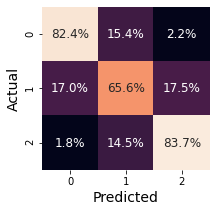

Macro F1 Scores: 
 Training: 0.861 
 Testing: 0.757




In [13]:
y_train_pred, y_test_pred, f1_train, f1_test =\
models.evaluate_pipeline(X_train = X_train_dtm,
                         y_train = y_train,
                         X_test = X_test_dtm,
                         y_test = y_test,
                         pipeline = model)

print("Macro F1 Scores: \n Training: {0:.3f} \n Testing: {1:.3f}\n\n".format(f1_train, f1_test))

In [0]:
feature_to_coefs = {
    word: coef for word, coef in zip(
        vectorizer.get_feature_names(),
        model.coef_.transpose()
    )
}

In [0]:
most_discriminatives = sorted(feature_to_coefs.items(),
                              key=lambda x: np.std(x[1]),
                              reverse=True)

least_discriminatives = sorted(feature_to_coefs.items(),
                               key=lambda x: np.std(x[1]),
                               reverse=False)

most_negative = sorted(feature_to_coefs.items(),
                       key=lambda x: x[1][0],
                       reverse=True)

most_neutral = sorted(feature_to_coefs.items(),
                      key=lambda x: x[1][1],
                      reverse=True)

most_positive = sorted(feature_to_coefs.items(),
                       key=lambda x: x[1][2],
                       reverse=True)

In [0]:
mosts = {"Most Discriminative":most_discriminatives,
         "Least Discriminative":least_discriminatives,
         "Most Negative":most_negative,
         "Most Neutral":most_neutral,
         "Most Positive":most_positive}

In [17]:
for name, lst in mosts.items():
  print("\n{name}:".format(name=name))
  for i in lst[:10]:
    feature = i[0]
    coefs = i[1]
    coefs = np.round(coefs, decimals=3)
    print('|'.join([feature, str(coefs[0]), str(coefs[1]), str(coefs[2])]))


Most Discriminative:
3 star|-0.525|0.868|-0.343
delicious|-0.601|-0.04|0.641
3 5|-0.348|0.703|-0.355
three star|-0.397|0.67|-0.273
terrible|0.57|-0.03|-0.54
horrible|0.593|-0.11|-0.483
not worth|0.493|0.093|-0.587
bland|0.565|-0.053|-0.513
excellent|-0.493|-0.074|0.567
disappointing|0.54|-0.039|-0.502

Least Discriminative:
even pull|-0.0|0.0|0.0
our condo|-0.0|0.0|0.0
decor that|-0.0|0.0|0.0
9 friend|0.0|-0.0|0.0
that fine|-0.0|0.0|-0.0
crispy perfection|-0.0|0.0|0.0
anyone because|0.0|-0.0|-0.0
canned corn|0.0|0.0|-0.0
mouth open|0.0|-0.0|-0.0
rice either|0.0|-0.0|-0.0

Most Negative:
horrible|0.593|-0.11|-0.483
terrible|0.57|-0.03|-0.54
bland|0.565|-0.053|-0.513
disappointing|0.54|-0.039|-0.502
2 star|0.528|-0.194|-0.335
disappointed|0.496|-0.042|-0.453
not worth|0.493|0.093|-0.587
rude|0.484|-0.052|-0.432
poor|0.481|-0.065|-0.416
awful|0.472|-0.124|-0.349

Most Neutral:
3 star|-0.525|0.868|-0.343
3 5|-0.348|0.703|-0.355
three star|-0.397|0.67|-0.273
ok|0.121|0.381|-0.502
a ok|-0.1

In [18]:
feature_to_coefs['not disappoint']

array([-0.27725653, -0.11469202,  0.39194855])

In [19]:
feature_to_coefs['not disappointed']

array([-0.16115416, -0.17447159,  0.33562575])

In [20]:
for f, c in feature_to_coefs.items():
  if 'service' in f:
    print (f, c)

1 service [ 0.0160764   0.00367267 -0.01974908]
10 service [-0.00617073 -0.00692375  0.01309448]
12 service [-0.00791651  0.00419194  0.00372457]
15 service [ 0.01160022 -0.01396535  0.00236513]
18 service [ 0.00568965 -0.00716572  0.00147607]
2 service [ 0.00759938 -0.00058375 -0.00701562]
20 service [ 0.00621571 -0.01461405  0.00839834]
3 service [ 0.00830871  0.00153356 -0.00984226]
30 service [ 0.00715269 -0.00165292 -0.00549978]
30pm service [ 0.00637313 -0.0084324   0.00205927]
4 service [-0.01915913 -0.02501873  0.04417786]
5 service [-0.01693147 -0.01118107  0.02811254]
6 service [-0.00133629  0.00189532 -0.00055902]
8 service [ 0.0024532  -0.00565546  0.00320226]
99 service [-0.0006634   0.00110464 -0.00044123]
a disservice [-0.01024697  0.00761469  0.00263228]
a service [ 0.00856015 -0.01653785  0.0079777 ]
a serviceable [ 0.00641151  0.00126659 -0.00767811]
about service [-0.01815131  0.01410705  0.00404426]
abysmal service [-0.00176955  0.00553861 -0.00376906]
acceptable se

In [0]:
# Example
example_actual = 1
example_pred = 2
example_incorrects = []

for i in range(len(y_test_pred)):
    if y_test_pred[i] == example_pred and y_test[i] == example_actual:
        example_incorrects.append(i)

In [0]:
r = random.choice(example_incorrects)
print("{0} : {1}".format(r, data_test.loc[r,'review']))

89141 : Been here a few times and they are consistently good. Staff is very patient and friendly which we needed because we could not figure what we wanted. Ended up going with what yelp recommends which was good and filling. A little too much on the starches though.
